In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2024-05-12 17:21:18.659649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 17:21:19.236071: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


11490434/11490434 [==============================] - 2s 0us/step


In [10]:
model = tf.keras.models.Sequential([
tf .keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(1000, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [14]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=16, batch_size=64, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/16


2024-05-12 17:25:29.337983: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-05-12 17:25:29.453840: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x845f040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-12 17:25:29.453869: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-05-12 17:25:29.460022: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-12 17:25:29.470638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-05-12 17:25:29.565799: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime

938/938 [==============================] - 2s 2ms/step - loss: 0.2047 - accuracy: 0.9401 - val_loss: 0.1083 - val_accuracy: 0.9674
Epoch 2/16
938/938 [==============================] - 2s 2ms/step - loss: 0.0797 - accuracy: 0.9757 - val_loss: 0.0770 - val_accuracy: 0.9761
Epoch 3/16
938/938 [==============================] - 2s 2ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0670 - val_accuracy: 0.9793
Epoch 4/16
938/938 [==============================] - 2s 2ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0590 - val_accuracy: 0.9812
Epoch 5/16
938/938 [==============================] - 2s 2ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0687 - val_accuracy: 0.9805
Epoch 6/16
938/938 [==============================] - 2s 2ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0618 - val_accuracy: 0.9817
Epoch 7/16
938/938 [==============================] - 2s 2ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0645 - val_accuracy: 0.9802
Epoch 8/16
938/93

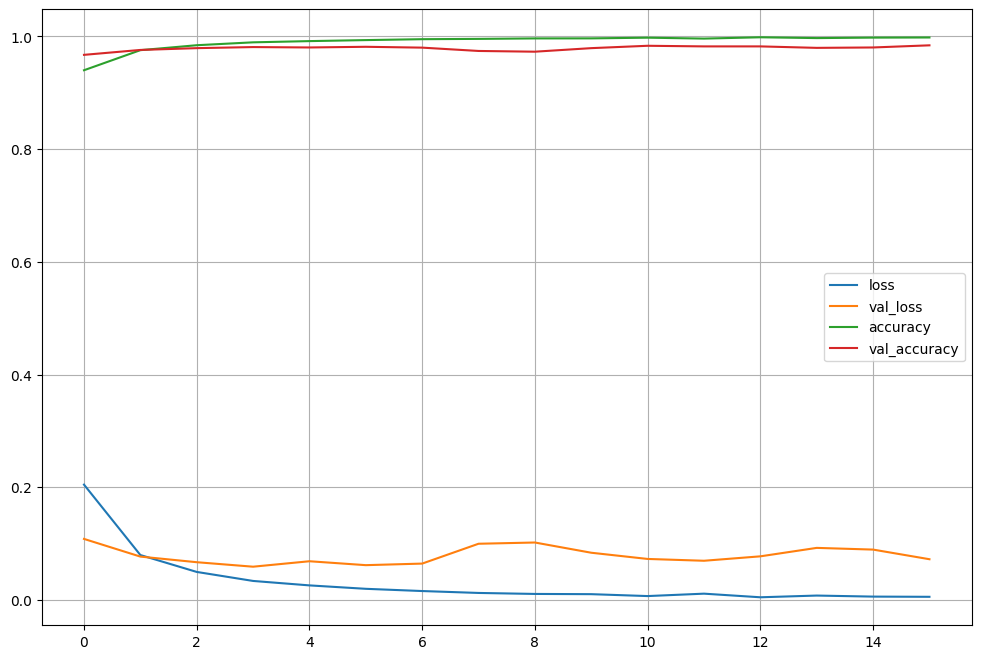

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy' ]

plt.figure(figsize=(12,8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [16]:
score = model.evaluate(x_test, y_test)
print('Test loss :', score[0])

print('Test accuracy :', score[1])

313/313 [==============================] - 0s 996us/step - loss: 0.0723 - accuracy: 0.9843
Test loss : 0.0722891092300415
Test accuracy : 0.9843000173568726


In [17]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[ :10]

313/313 [==============================] - 0s 627us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [18]:
wrong_result = []
for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:

    wrong_result.append(n)

len(wrong_result)

157

In [19]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[1014,
 4823,
 2224,
 2877,
 2654,
 9634,
 1242,
 6560,
 5457,
 7823,
 1319,
 4551,
 4065,
 3474,
 4369,
 2488]

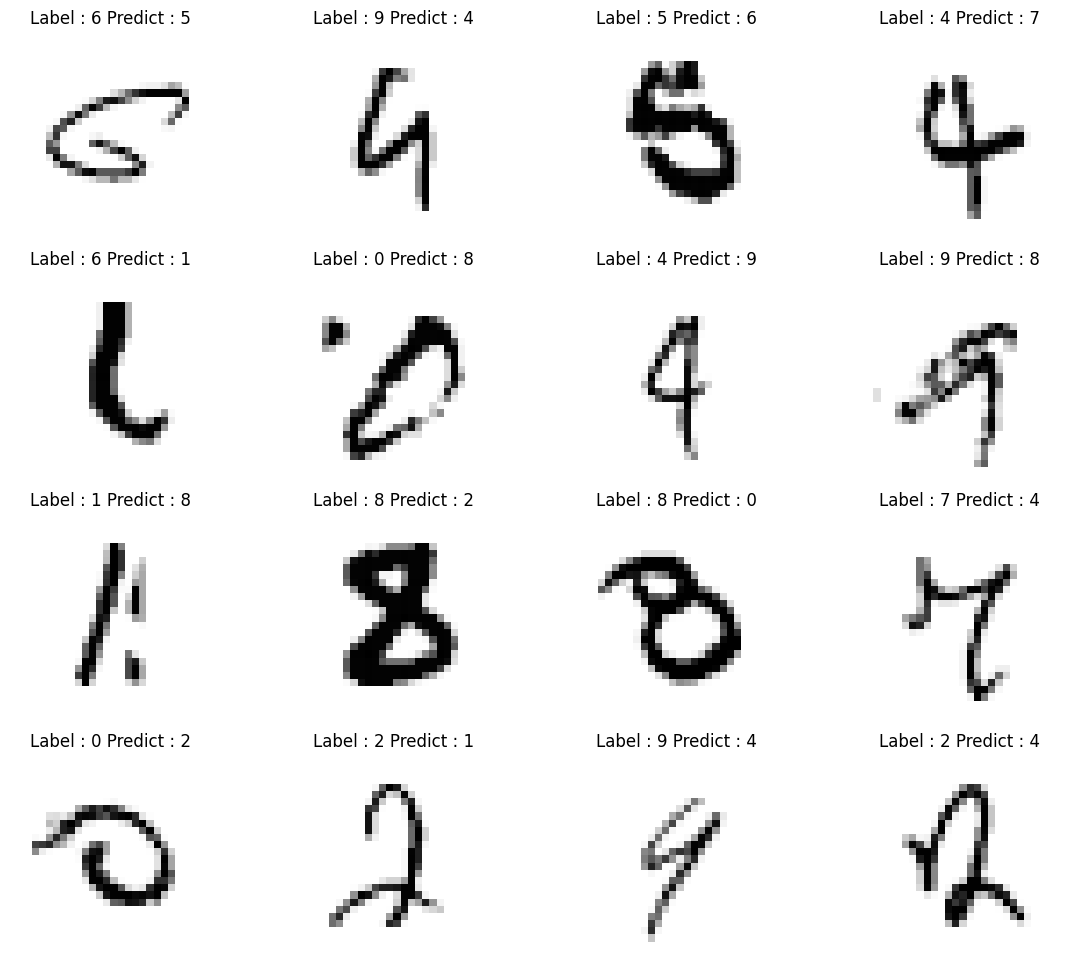

In [20]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples) :
  plt.subplot(4, 4, idx+1)
  plt.imshow(x_test[n] .reshape(28,28), cmap='Greys', interpolation='nearest' )
  plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
  plt.axis('off')

plt.show()

fashion mnist z


In [21]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.8, X_test / 255.0

4422102/4422102 [==============================] - 1s 0us/step


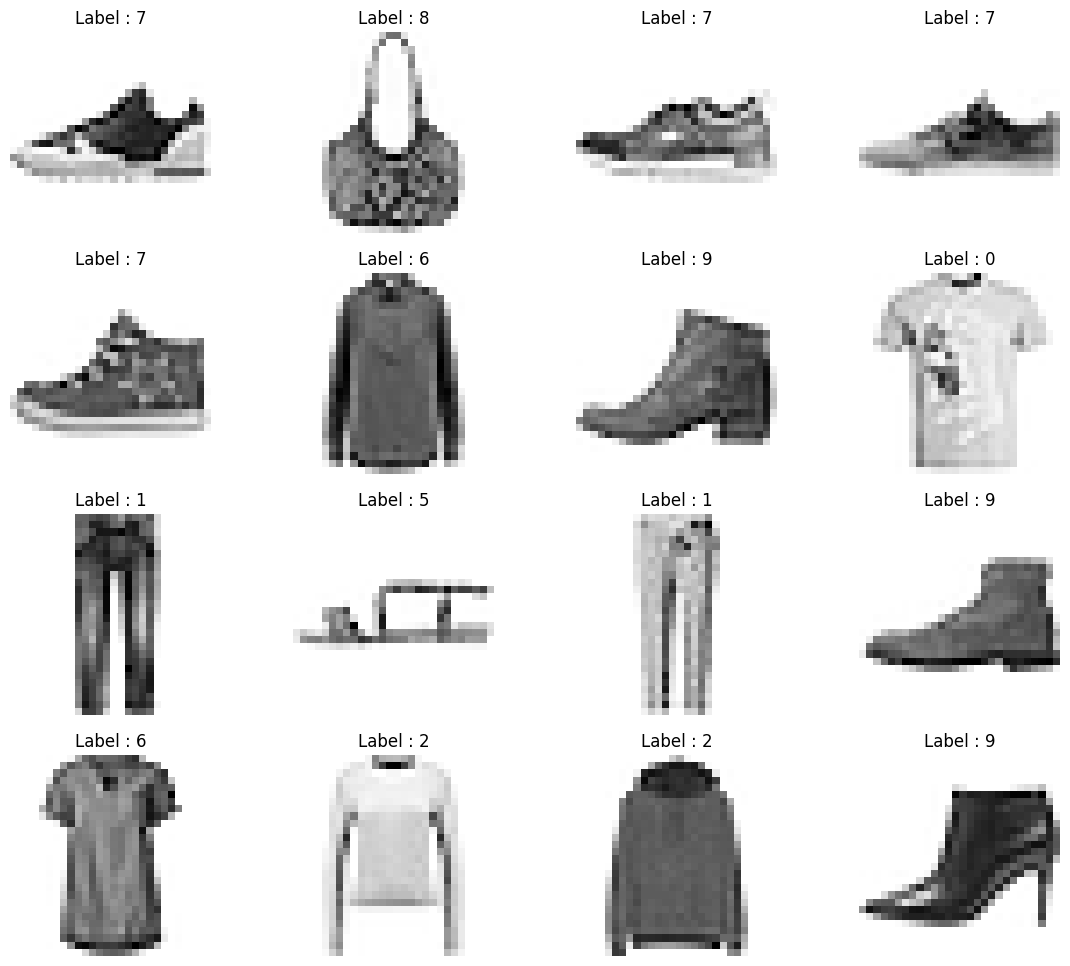

In [22]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0,len(y_train)), k=16)
plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.title('Label : ' + str(y_train[n]) )

  plt.axis('off')

plt.show()


In [23]:
model = tf.keras.models.Sequential([
tf .keras.layers.Flatten(input_shape=(28, 28)),
tf. keras.layers.Dense(1000, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax' )

])

model .compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 1000)              785000    
                                                                 
 dense_7 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [25]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
epochs=10, batch_size=100, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.4833 - accuracy: 0.8295 - val_loss: 0.4265 - val_accuracy: 0.8435
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3597 - accuracy: 0.8692 - val_loss: 0.3751 - val_accuracy: 0.8619
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3210 - accuracy: 0.8815 - val_loss: 0.3763 - val_accuracy: 0.8637
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3001 - accuracy: 0.8901 - val_loss: 0.3531 - val_accuracy: 0.8711
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2815 - accuracy: 0.8960 - val_loss: 0.3654 - val_accuracy: 0.8683
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2650 - accuracy: 0.9013 - val_loss: 0.3330 - val_accuracy: 0.8802
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2529 - accuracy: 0.9051 - val_loss: 0.3229 - val_accuracy: 0.8830
Epoch 

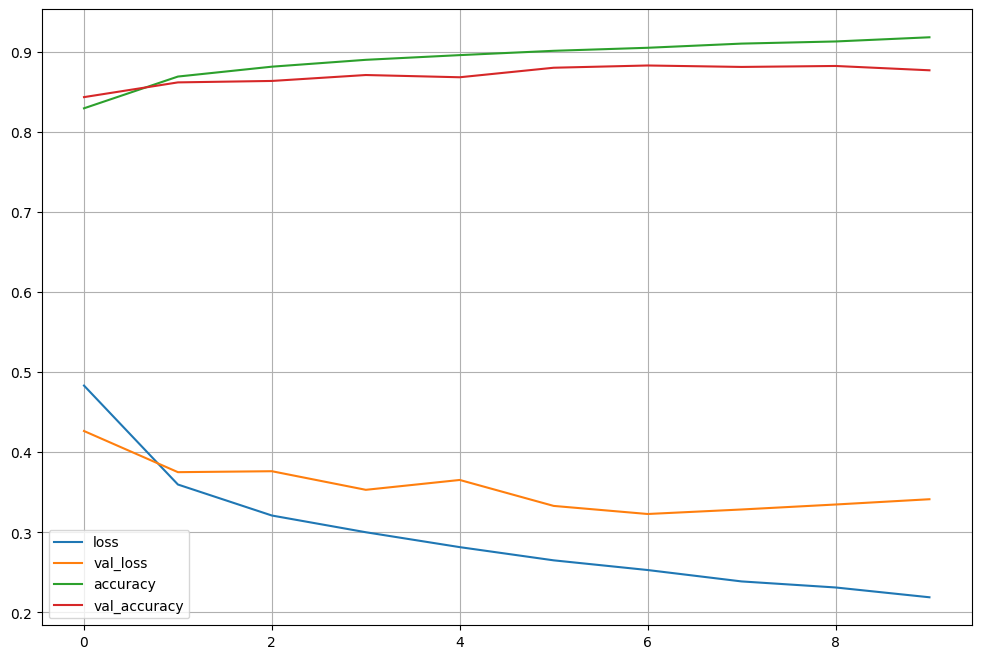

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [28]:
score = model.evaluate(X_test, y_test)

print('Test loss :', score[0])

print('Test accuracy :', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8770
Test loss : 0.34131261706352234
Test accuracy : 0.8769999742507935


In [29]:
import numpy as np

predicted_result = model.predict(X_test)

predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[ :10]

313/313 [==============================] - 0s 686us/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [30]:
wrong_result = []
for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:

    wrong_result.append(n)

len(wrong_result)

1230

In [31]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[8834,
 8429,
 5777,
 2312,
 8818,
 9748,
 3833,
 8091,
 6671,
 4460,
 2548,
 672,
 374,
 9947,
 1867,
 4897]

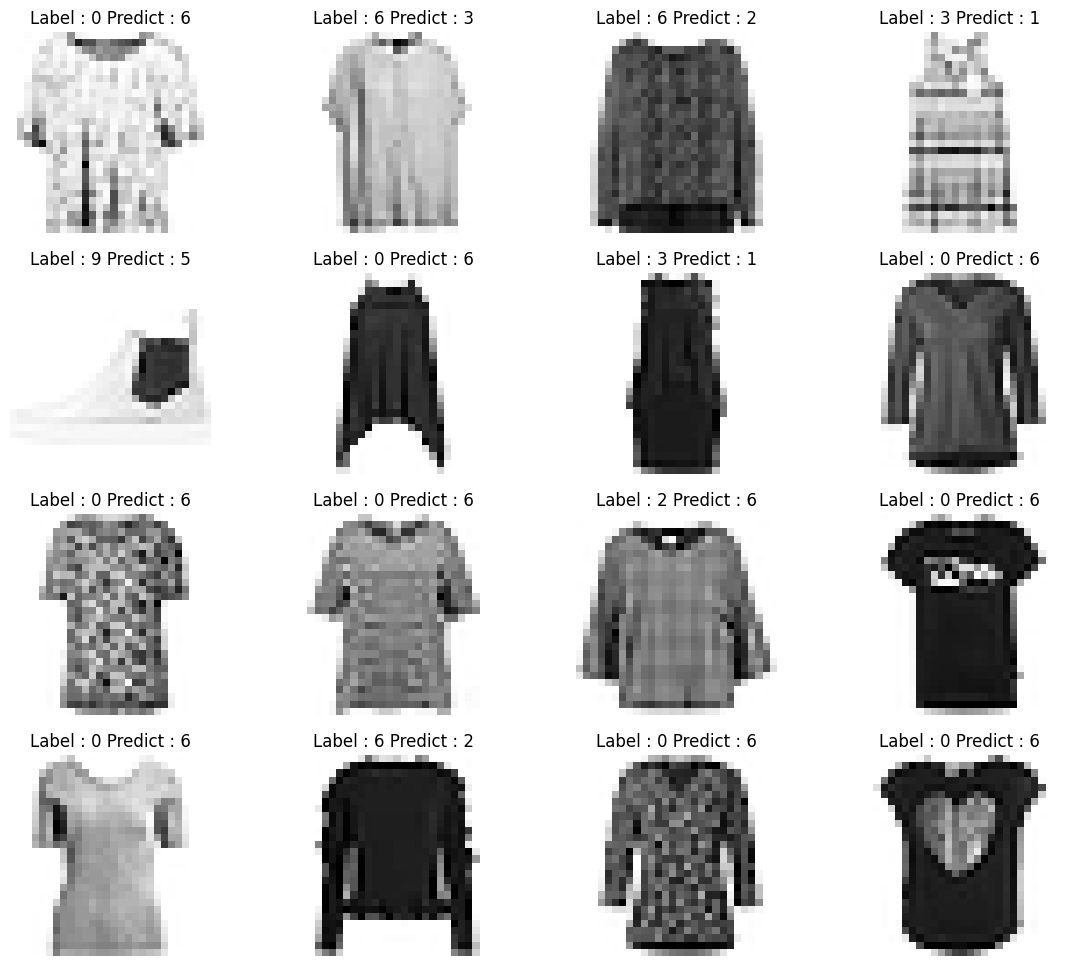

In [32]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples) :
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest' )
  plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
  plt.axis('off')

plt.show()